In [1]:
# to make import as we would be in root directory
import sys
sys.path.append('..')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange

from lib.autoencoders import TestAutoencoder
import lib.training as training
import lib.utils as utils

c:\Users\Lukasz\anaconda3\envs\un7\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload

In [3]:
%autoreload

## Loading training dataset

In [3]:
emnist_pages, kmnist_pages = training.load_dataset_pages('noise_only', 36)

In [4]:
emnist_pages = 1 - emnist_pages
kmnist_pages = 1 - kmnist_pages

In [5]:
emnist_chars = rearrange(emnist_pages, 'p (H h) (W w) -> (p H W) h w', h=32, w=32)
kmnist_chars = rearrange(kmnist_pages, 'p (H h) (W w) -> (p H W) h w', h=32, w=32)

In [6]:
fil_emnist_chars, fil_kmnist_chars = training.filter_white_characters(
    emnist_chars, kmnist_chars, threshold=0.1)

Dropped 67.2% characters


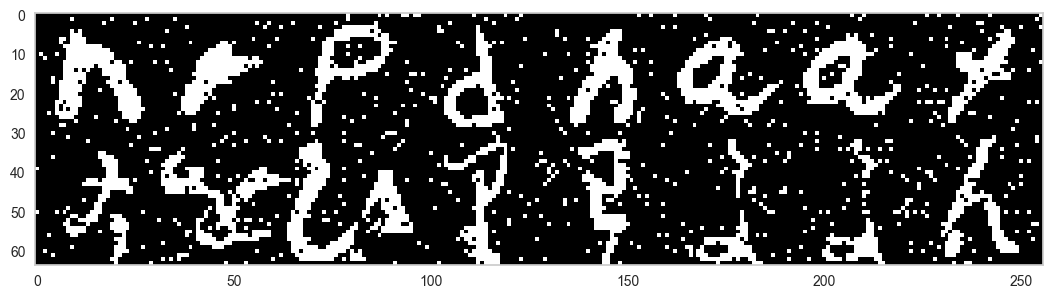

In [7]:
training.show_datasets(fil_emnist_chars, fil_kmnist_chars, samples_count=8)

## EMNIST

In [14]:
emnist_autoencoder = TestAutoencoder('noise_only_autoencoder_emnist', output_features=20)

In [15]:
# training
emnist_autoencoder.model.fit(fil_emnist_chars, fil_emnist_chars, epochs=2, batch_size=64)

Epoch 1/2
1682/1682 [==============================] - 15s 8ms/step - loss: 0.0484
Epoch 2/2
1682/1682 [==============================] - 14s 8ms/step - loss: 0.0453


In [248]:
emnist_autoencoder.save()

In [249]:
emnist_autoencoder.load()

1/1 [==============================] - 0s 83ms/step


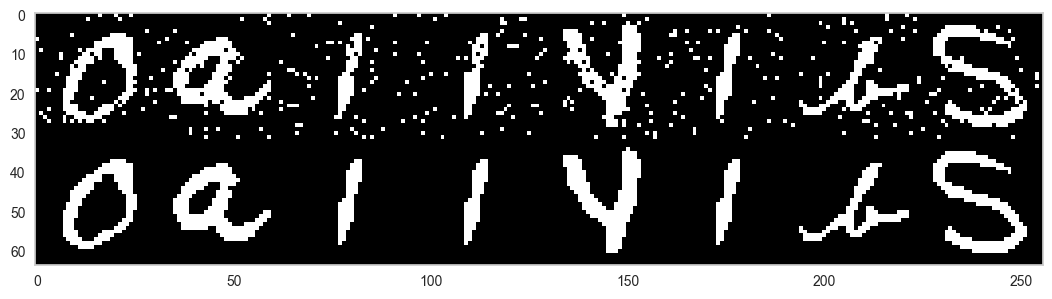

In [16]:
training.test_autoencoder(emnist_autoencoder, fil_emnist_chars, samples_count=8, binarize=True)

In [17]:
# Different batch_sizes are giving different outputs! Strange!
encoded_emnist = emnist_autoencoder.encoder.predict(fil_emnist_chars, batch_size=64)

1682/1682 [==============================] - 2s 1ms/step


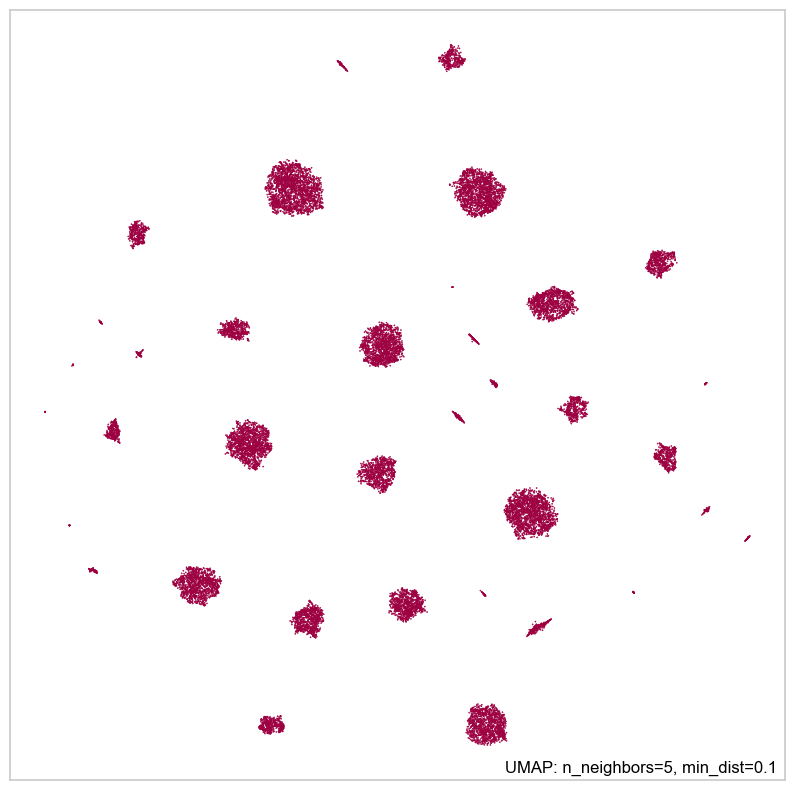

In [18]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
utils.visualize_clusters(encoded_emnist, ax, n_samples=20_000)

Clusters count: 35


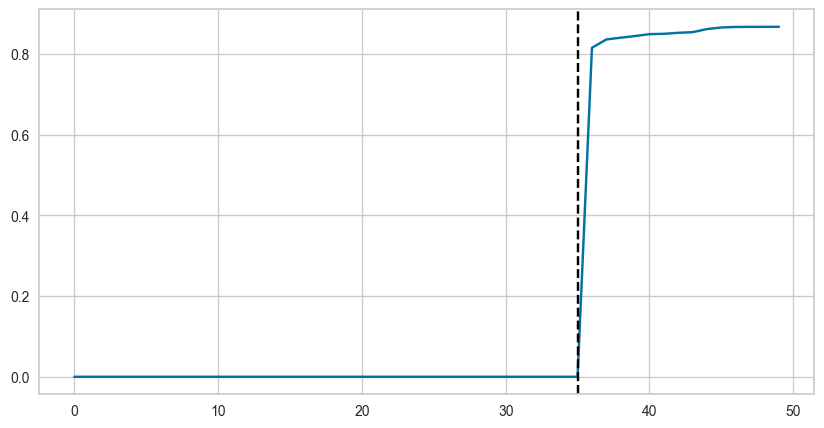

In [19]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
emnist_clusters_no = utils.get_number_of_clusters_with_eigen_values(encoded_emnist, ax, n_samples=3_000)
print('Clusters count:', emnist_clusters_no)

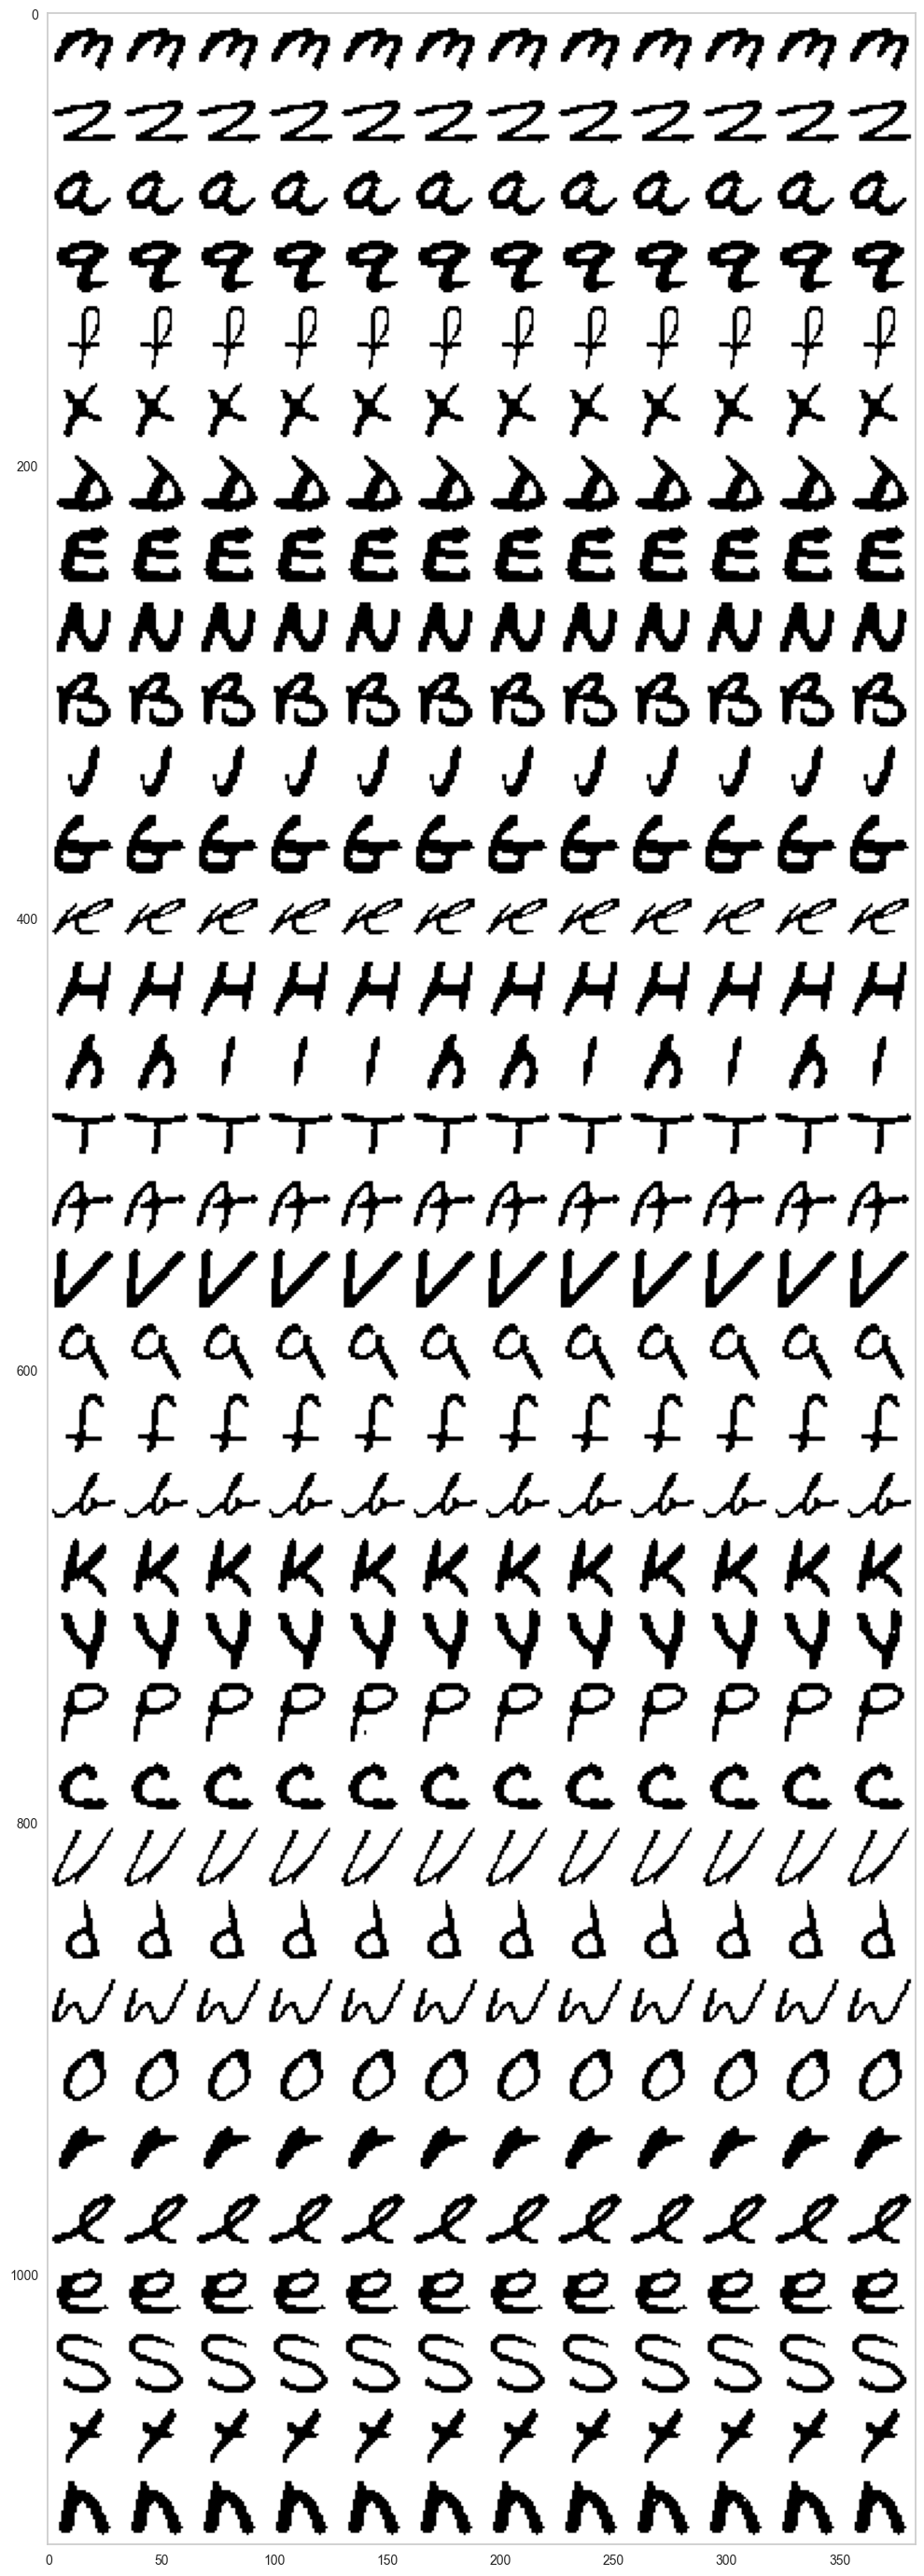

In [20]:
sampled_encoded_emnist = utils.sample(encoded_emnist, n_samples=7_000)
emnist_labels = utils.cluster(sampled_encoded_emnist, emnist_clusters_no)
sorted_encoded_emnist = utils.sort_characters_by_labels(sampled_encoded_emnist, emnist_labels)
_ = utils.visualize_sorted_characters(sorted_encoded_emnist, emnist_autoencoder, binarize=True)

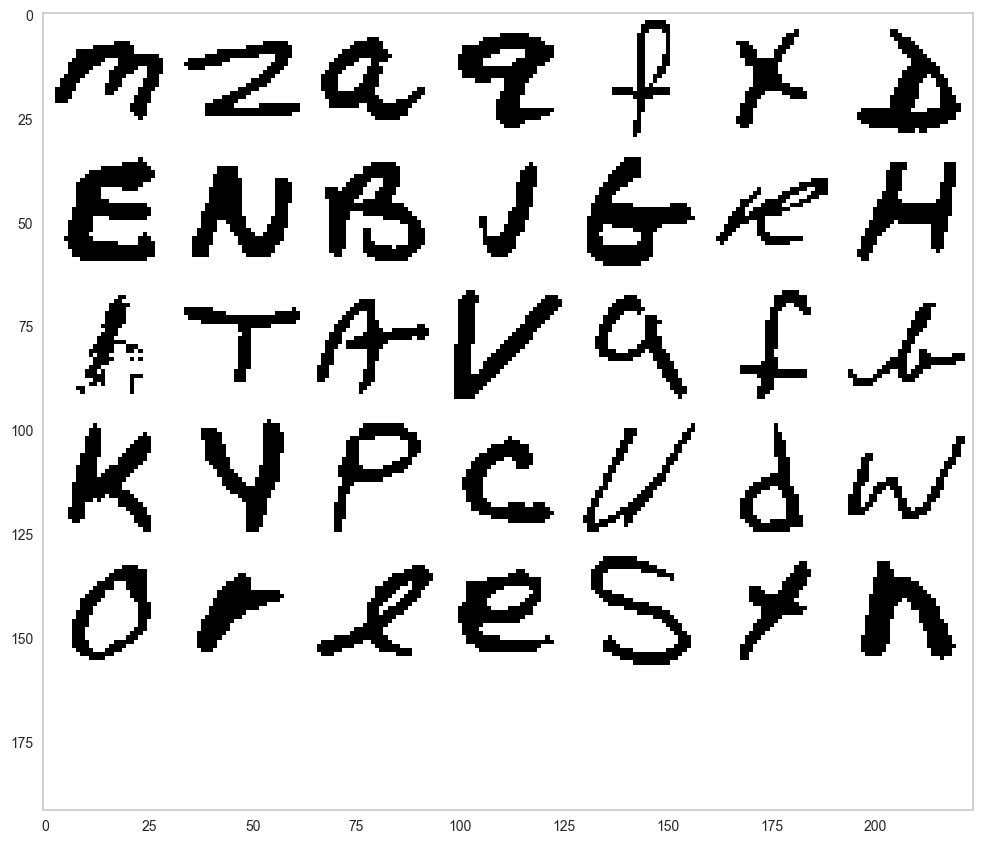

In [21]:
emnist_representatives = training.create_characters_representatives(sorted_encoded_emnist, emnist_autoencoder)
training.show_characters_representatives(emnist_representatives)

In [41]:
emnist_clusters_sizes = [len(class_characters) for class_characters in sorted_encoded_emnist]
emnist_autoencoder.quantities = emnist_clusters_sizes
emnist_autoencoder.characters = emnist_representatives
emnist_autoencoder.save()

## KMNIST

In [31]:
kmnist_autoencoder = TestAutoencoder('noise_only_autoencoder_kmnist', output_features=20)

In [32]:
# training
kmnist_autoencoder.model.fit(fil_kmnist_chars, fil_kmnist_chars, epochs=2, batch_size=64)

Epoch 1/2
1682/1682 [==============================] - 15s 8ms/step - loss: 0.0490
Epoch 2/2
1682/1682 [==============================] - 14s 8ms/step - loss: 0.0452


In [ ]:
# saving
kmnist_autoencoder.save()

In [320]:
# loading
kmnist_autoencoder.load()

1/1 [==============================] - 0s 87ms/step


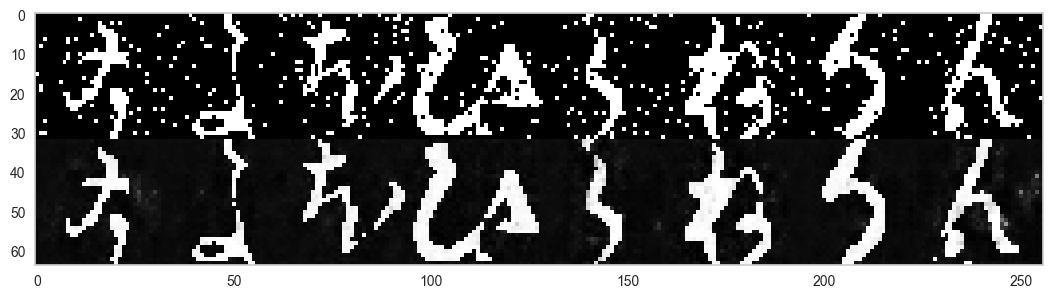

In [33]:
# testing
training.test_autoencoder(kmnist_autoencoder, fil_kmnist_chars, samples_count=8)

In [34]:
encoded_kmnist = kmnist_autoencoder.encoder.predict(fil_kmnist_chars, batch_size=256)

421/421 [==============================] - 1s 2ms/step


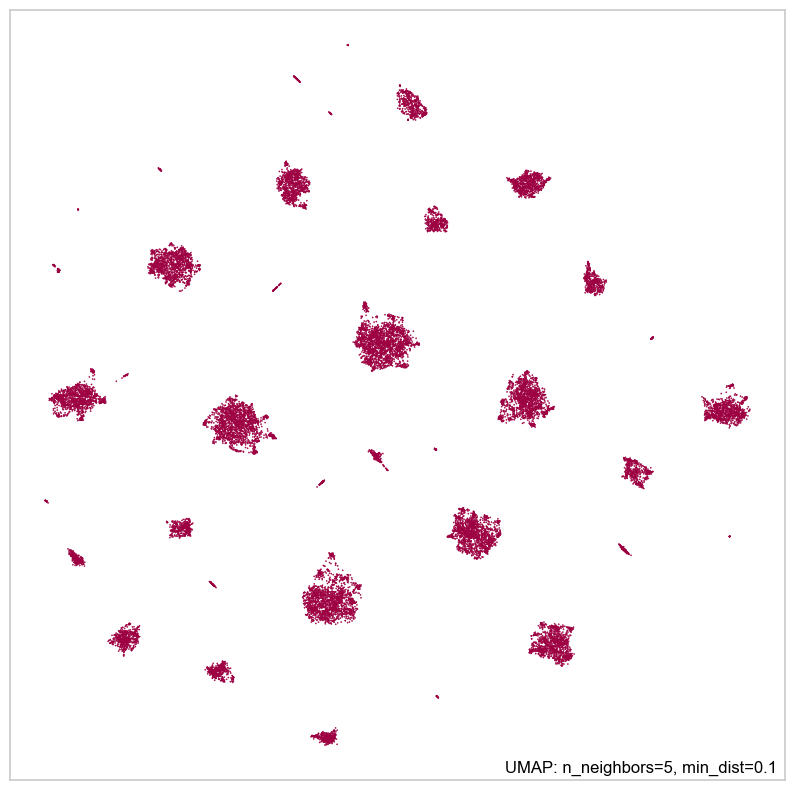

In [35]:
_, ax = plt.subplots(1, 1, figsize=(10, 10))
utils.visualize_clusters(encoded_kmnist, ax, n_samples=20_000)

Clusters count: 35


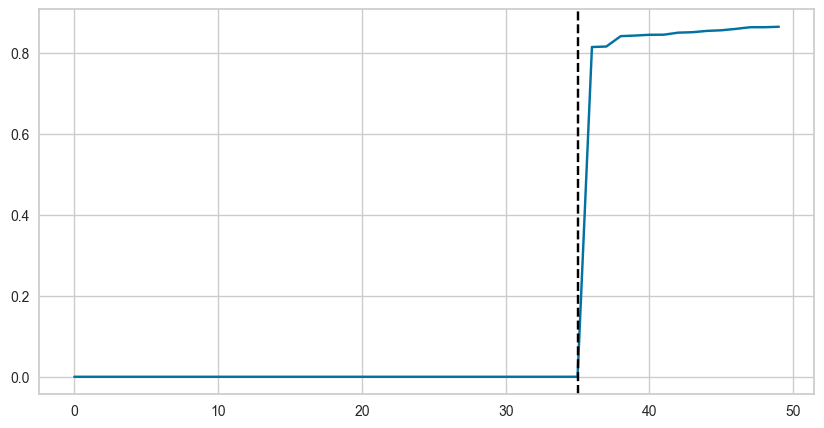

In [36]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
kmnist_clusters_no = utils.get_number_of_clusters_with_eigen_values(encoded_kmnist, ax, n_samples=3_000)
print('Clusters count:', kmnist_clusters_no)

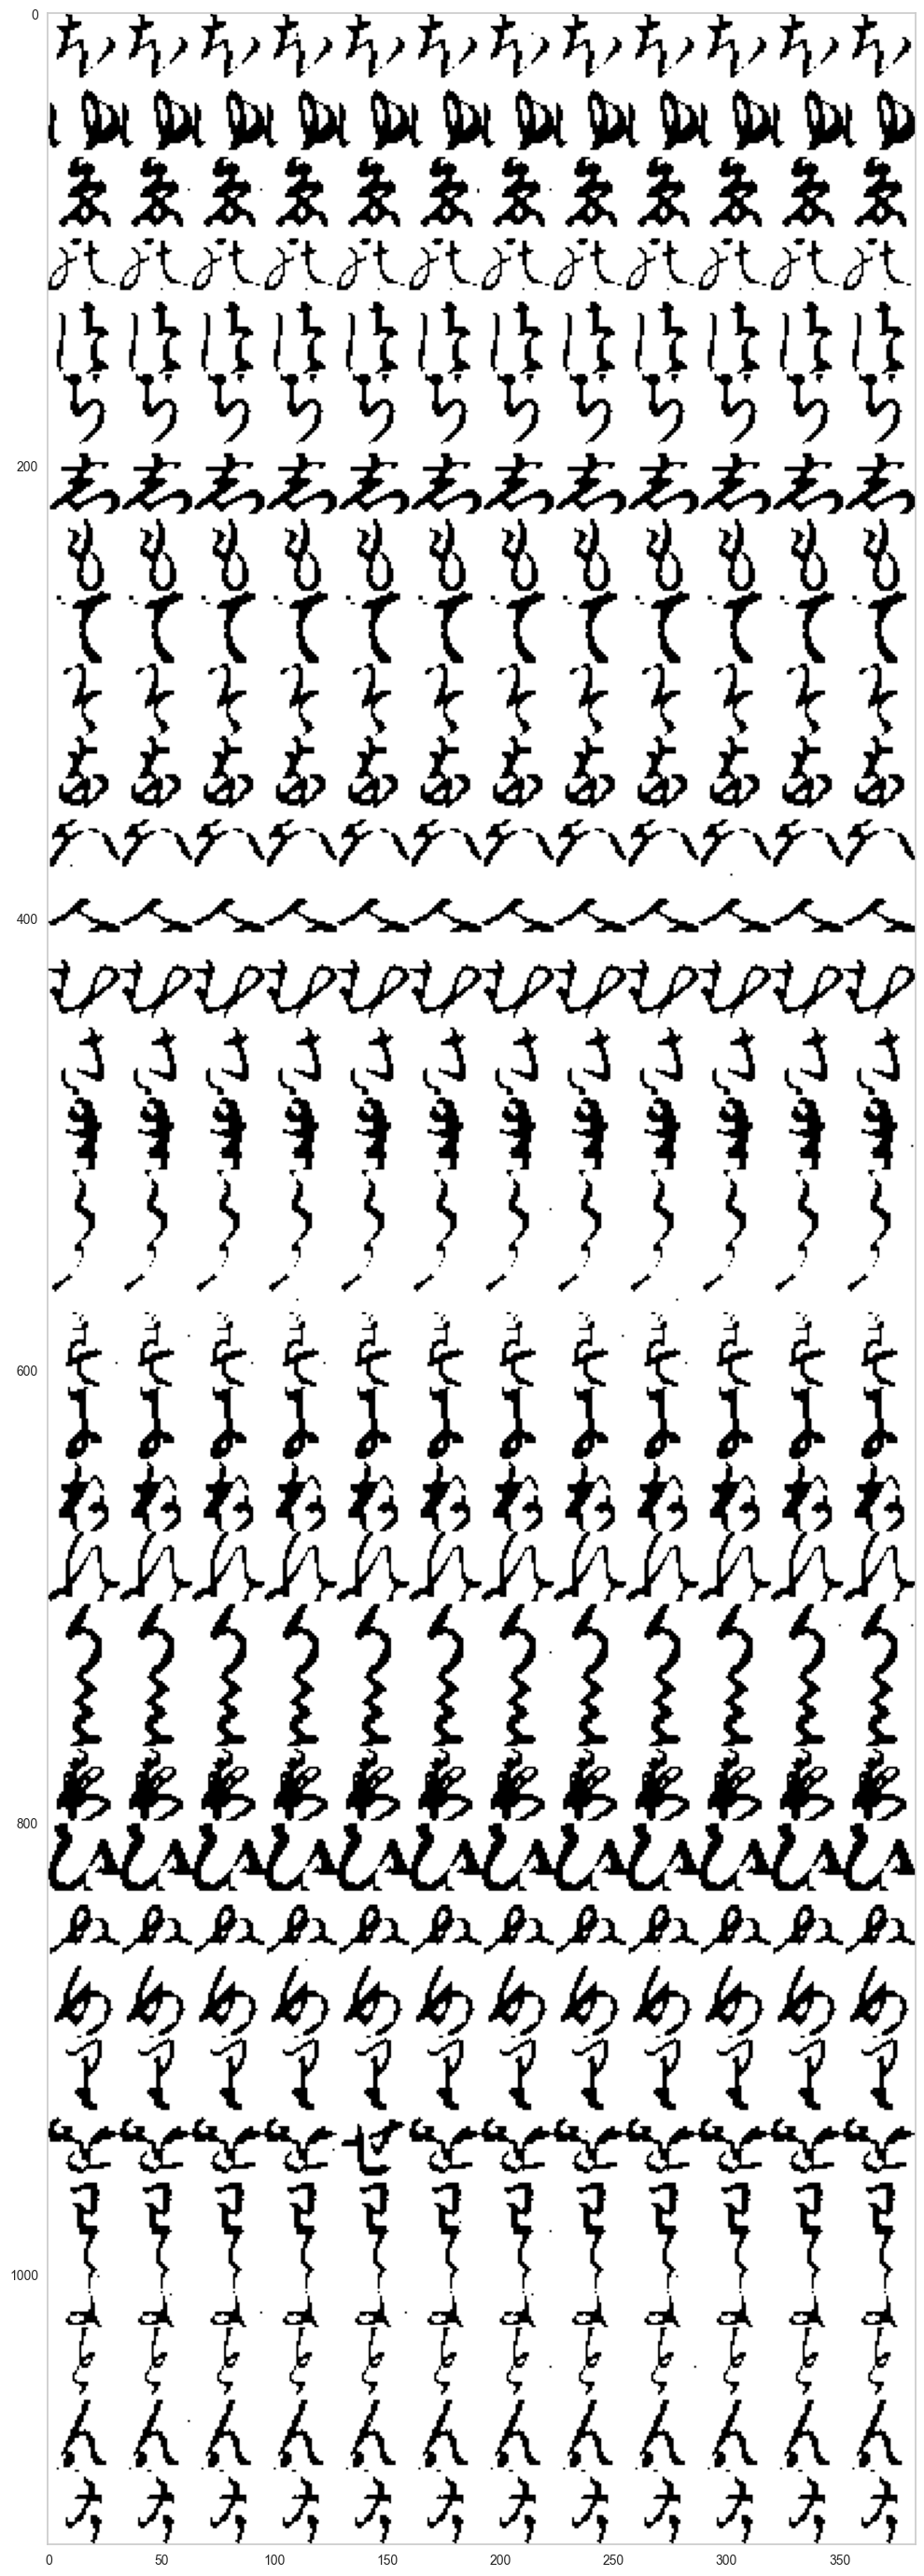

In [37]:
sampled_encoded_kmnist = utils.sample(encoded_kmnist, n_samples=7_000)
kmnist_labels = utils.cluster(sampled_encoded_kmnist, kmnist_clusters_no)
sorted_encoded_kmnist = utils.sort_characters_by_labels(sampled_encoded_kmnist, kmnist_labels)
_ = utils.visualize_sorted_characters(sorted_encoded_kmnist, kmnist_autoencoder, binarize=True)

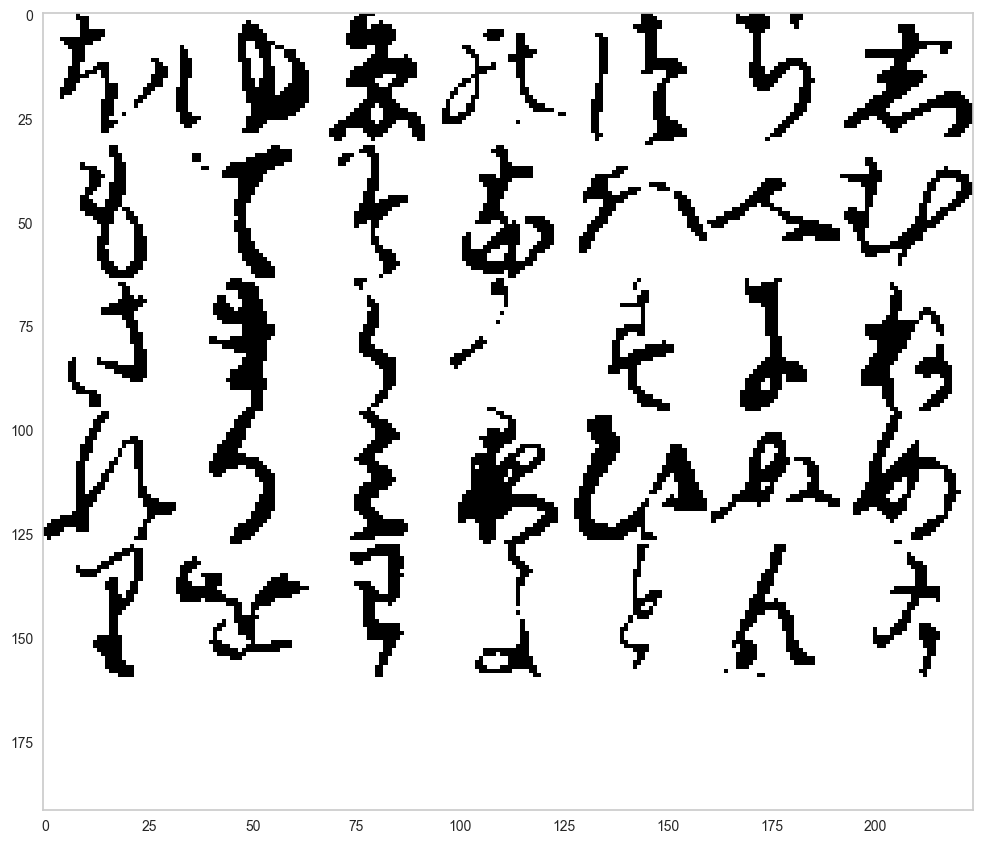

In [38]:
kmnist_representatives = training.create_characters_representatives(sorted_encoded_kmnist, kmnist_autoencoder)
training.show_characters_representatives(kmnist_representatives)

In [40]:
kmnist_clusters_sizes = [len(class_characters) for class_characters in sorted_encoded_kmnist]
kmnist_autoencoder.quantities = kmnist_clusters_sizes
kmnist_autoencoder.characters = kmnist_representatives
kmnist_autoencoder.save()